In [41]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [42]:
%matplotlib notebook

In [43]:
D = 1
t0 = .7
t_array = linspace(t0,5,501)
x_array = linspace(0,5,3000)
x,t = meshgrid(x_array,t_array)
starting_sigma = (2*D*t0)**.5; print(starting_sigma)

1.1832159566199232


<IPython.core.display.Javascript object>


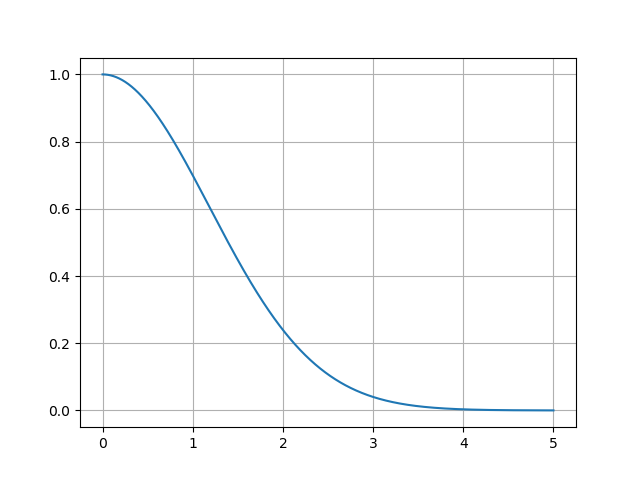

In [44]:
hslice = exp(-x_array**2/(2*starting_sigma**2))
plt.figure()
plt.plot(x_array,hslice)
plt.grid(True)

<IPython.core.display.Javascript object>


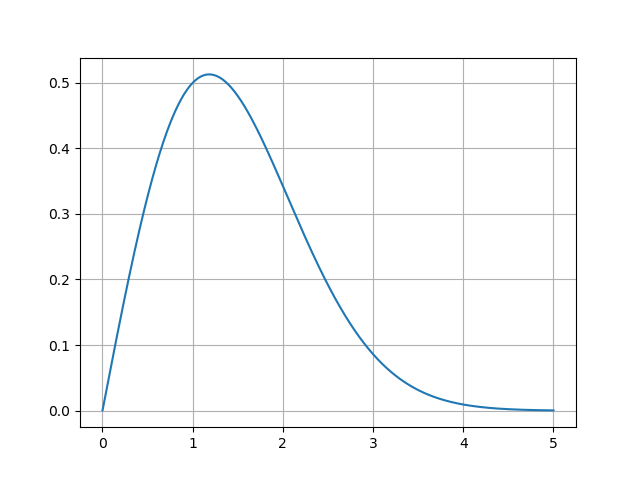

In [45]:
Zslice = -diff(hslice)/diff(x_array)
plt.figure()
plt.plot(x_array[1:],Zslice)
plt.grid(True)

In [66]:
Z2tot = (x**2*(t0/t)*exp(-x**2/(2*D*t)))/(4*D**2*t**2)
Z2totSize = size(Z2tot)
Z2tot_long = reshape(Z2tot, Z2totSize)
Z2max = max(Z2tot_long); print (Z2max)
Z2max_math = 1/(2*D*t0*exp(1)); print(Z2max_math)

0.2627709310350663
0.2627710294081731


<IPython.core.display.Javascript object>


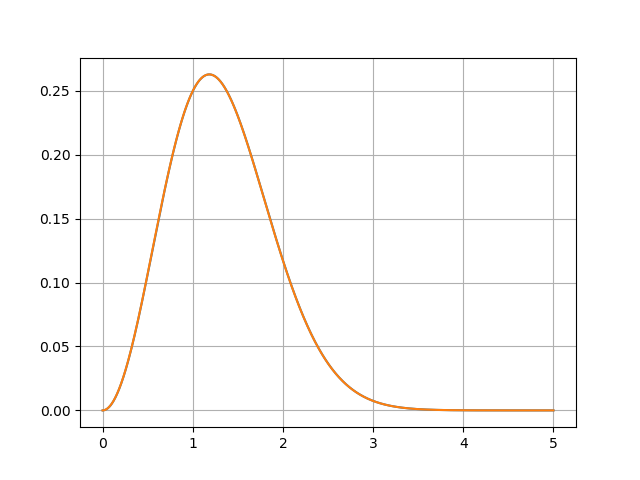

In [47]:
Z2slice = Zslice**2
plt.figure()
plt.plot(x_array[1:],Z2slice)
plt.plot(x_array,Z2tot[0,:])
plt.grid(True)

<IPython.core.display.Javascript object>


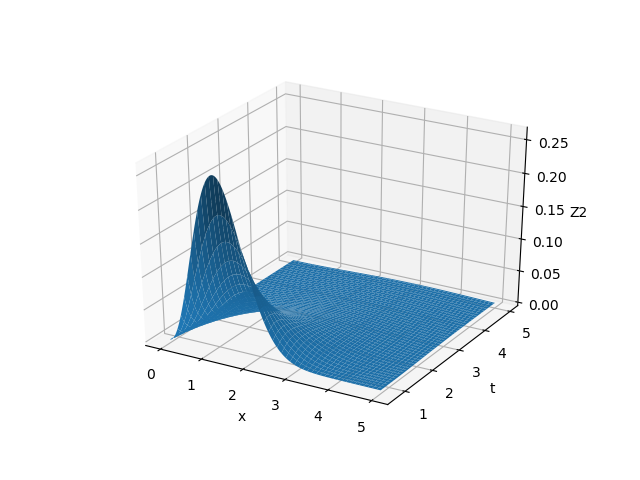

Text(0.5,0,'Z2')

In [48]:
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(x,t, Z2tot) # Make th1 mesh plot
ax.set_xlabel('x') # Label axes
ax.set_ylabel('t')
ax.set_zlabel('Z2')

(501, 2998)
(501,)
(500,)


<IPython.core.display.Javascript object>


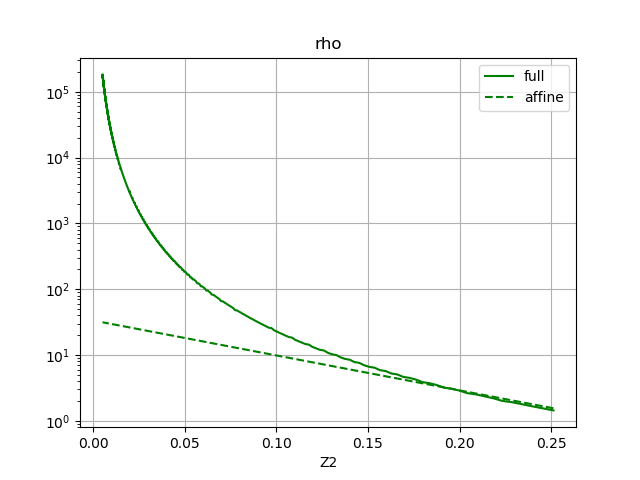

sigma= 0.28
sigma= 0.2859801469971463


In [49]:
# Getting the approximation based on inflection points
Z2curvature = diff(Z2tot,2,1); print(shape(Z2curvature))
inflection = argmin(Z2curvature,1)
Z2curvature_at_inflection = zeros(len(t_array)); print(shape(Z2curvature_at_inflection))
Z2_at_inflection = zeros(len(t_array))
Z2_weighted = zeros(len(t_array))
for i in range(len(t_array)):
    Z2curvature_at_inflection[i] = -Z2curvature[i,inflection[i]]
    Z2_at_inflection[i] = Z2tot[i,inflection[i]]
Z2curvature_at_inflection_max = max(Z2curvature_at_inflection)
Z2curvature_at_inflection /= Z2curvature_at_inflection_max
Z2curvature_at_inflection_weight = 1/Z2curvature_at_inflection

# plt.figure()
# plt.plot(t_array,Z2curvature_at_inflection)
# plt.xlabel('time')
# plt.title('curvature at inflection, normalized')
# plt.grid(True)

# plt.figure()
# plt.plot(t_array,Z2curvature_at_inflection_weight)
# plt.xlabel('time')
# plt.title('weight due to curvature at inflection')
# plt.grid(True)

dtdZ2 = diff(t_array)/diff(Z2_at_inflection); print(shape(dtdZ2))
rho = -dtdZ2*Z2curvature_at_inflection_weight[1:]
plt.figure()
plt.semilogy(Z2_at_inflection[1:],rho,'g',label='full')

# Getting a linear approximation
thatp = polyfit(Z2_at_inflection[0:5],log(rho[0:5]),1); 
thatsigma = int((-1/thatp[0])**.5*100)/100; print('sigma=',thatsigma)
print('sigma=',(-1/thatp[0])**.5)
logrho_fit = polyval(thatp,Z2_at_inflection[1:])
rho_fit = exp(logrho_fit)
plt.semilogy(Z2_at_inflection[1:],rho_fit,'g--',label='affine')


plt.xlabel('Z2')
plt.title('rho')
plt.grid(True)
plt.legend()

[1318979  102700   36889   18615   10853    6720    4323    2634    1287]
ratio =  1024.8477078477079
sigma= 0.25
[0.04058172 0.02610637 0.01679432 0.01080385 0.00695015 0.00447106
 0.00287625 0.0018503  0.0011903 ]


<IPython.core.display.Javascript object>


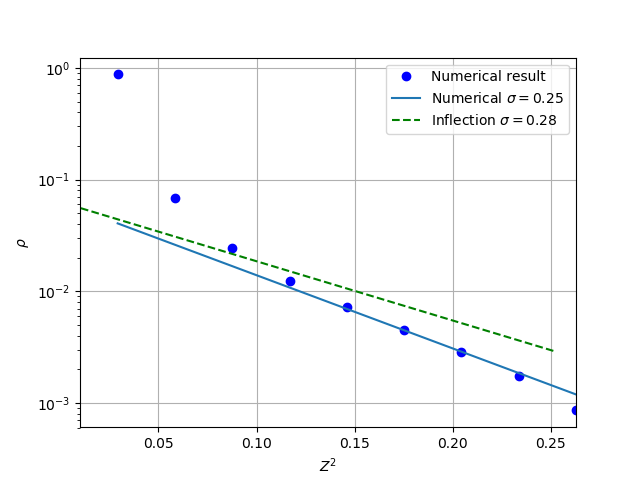

(0.01, 0.2627709310350663)

In [50]:
# Collecting the actual probabilities as a function of Z2
mybins = linspace(0,Z2max,10)
counts, bins = histogram(Z2tot_long,mybins); print(counts)
print('ratio = ', counts[0]/counts[-1])
counts = counts/sum(counts)

# plt.figure()
# plt.loglog(bins[1:], counts, 'o', label='Numerical result')
# plt.loglog(Z2_at_inflection[1:],rho_fit/scalefactor, label='Inflection points only')
# plt.grid(True)
# plt.xlabel('$Z^2$')
# plt.ylabel(r'$\rho$')
# plt.grid(True)
# plt.legend()
# plt.xlim([.01,Z2max])

# Getting a linear approximation
thisp = polyfit(bins[-4:-2], log(counts[-4:-2]),1); 
thissigma = int((-1/thisp[0])**.5*100)/100; print('sigma=',thissigma)
logcounts_fit = polyval(thisp,bins[1:])
counts_fit = exp(logcounts_fit); print(counts_fit)

# Adjusting the inflection's y-intercept
thatp[1]=thisp[1]
logrho_fit = polyval(thatp,Z2_at_inflection[1:])
rho_fit = exp(logrho_fit)

plt.figure()
plt.semilogy(bins[1:], counts, 'ob', label='Numerical result')
plt.semilogy(bins[1:],counts_fit,label=r'Numerical $\sigma = $'+str(thissigma))
plt.semilogy(Z2_at_inflection[1:],rho_fit, 'g--', label=r'Inflection $\sigma = $'+str(thatsigma))

plt.grid(True)
plt.xlabel('$Z^2$')
plt.ylabel(r'$\rho$')
plt.grid(True)
plt.legend()
plt.xlim([.01,Z2max])

0.29


<IPython.core.display.Javascript object>


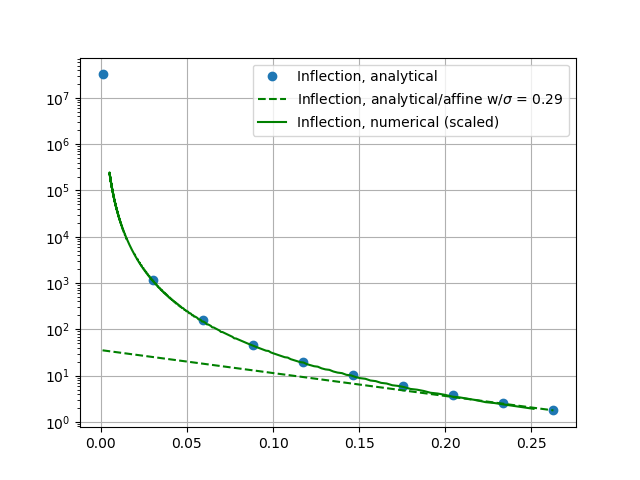

In [78]:
Z2 = linspace(0.001,Z2max,10)
rhomath = 0.0459849301464303*(t0*(t0/(D*Z2))**(-0.5)/Z2)**4.0/(D**2*Z2*t0)

f0 =  log(0.0459849301464303*(t0*(t0/(D*Z2max))**(-0.5)/Z2max)**4.0/(D**2*Z2max*t0))
f1 =  -3.0/Z2max
logrhomath_affine = f0 + f1*(Z2-Z2max)
rhomath_affine = exp(logrhomath_affine)
mathsigma = 1/sqrt(6*D*t0*exp(1)); 
mathsigma = int(mathsigma*100)/100; print(mathsigma)

plt.figure()
plt.semilogy(Z2,rhomath,'o',label='Inflection, analytical')
plt.semilogy(Z2,rhomath_affine,'g--',label='Inflection, analytical/affine w/$\sigma$ = '+str(mathsigma))
plt.semilogy(Z2_at_inflection[1:],rho/.75,'g',label='Inflection, numerical (scaled)')
plt.grid(True)
plt.legend()